In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('fvc.csv')
df.tail()

,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,VEHICLE_DCA_CODE,INITIAL_DIRECTION,ROAD_SURFACE_TYPE,ROAD_SURFACE_TYPE_DESC,REG_STATE,VEHICLE_BODY_STYLE,VEHICLE_MAKE,...,TRAILER_TYPE,VEHICLE_COLOUR_1,VEHICLE_COLOUR_2,CAUGHT_FIRE,INITIAL_IMPACT,LAMPS,LEVEL_OF_DAMAGE,TOWED_AWAY_FLAG,TRAFFIC_CONTROL,TRAFFIC_CONTROL_DESC
259450,T20250001075,B,2012.0,2.0,S,1.0,Paved,V,UTIL,FORD,...,H,BLU,ZZ,2.0,2,2.0,5,1.0,0.0,No control
259451,T20250001671,A,2015.0,2.0,NW,1.0,Paved,V,WAGON,B M W,...,H,WHI,ZZ,2.0,F,2.0,2,9.0,0.0,No control
259452,T20250001949,A,2010.0,1.0,NE,1.0,Paved,V,SEDAN,HOLDEN,...,H,GRY,ZZ,2.0,F,2.0,9,9.0,0.0,No control
259453,T20250002210,A,2021.0,1.0,NW,1.0,Paved,V,WAGON,MITSUB,...,H,SIL,ZZ,2.0,F,0.0,1,2.0,1.0,Stop-go lights
259454,T20250002210,B,2013.0,2.0,NW,1.0,Paved,V,WAGON,HONDA,...,H,BLK,ZZ,2.0,R,0.0,2,2.0,1.0,Stop-go lights


In [28]:
specified_columns = ['VEHICLE_YEAR_MANUF','VEHICLE_BODY_STYLE','VEHICLE_MAKE']
new_df = df[specified_columns]
new_df.tail()

,VEHICLE_YEAR_MANUF,VEHICLE_BODY_STYLE,VEHICLE_MAKE
259450,2012.0,UTIL,FORD
259451,2015.0,WAGON,B M W
259452,2010.0,SEDAN,HOLDEN
259453,2021.0,WAGON,MITSUB
259454,2013.0,WAGON,HONDA


In [16]:
rdf = new_df.rename(columns={'VEHICLE_YEAR_MANUF':'VYM','VEHICLE_BODY_STYLE':'VBS','VEHICLE_MAKE':'VM'})
rdf.head()

,VYM,VBS,VM
0,1996.0,SEDAN,HOLDEN
1,2002.0,SEDAN,HOLDEN
2,1988.0,SEDAN,TOYOTA
3,1997.0,SEDAN,MITSUB
4,2010.0,WAGON,TOYOTA


In [18]:
unique = rdf.nunique()
unique

VYM     64
VBS     88
VM     238
dtype: int64

In [30]:
crash_counts = rdf.groupby(['VYM','VBS','VM']).size().reset_index(name='CRASH_COUNT')

crash_counts = crash_counts.sort_values(by='CRASH_COUNT', ascending=False)

crash_counts.head()

,VYM,VBS,VM,CRASH_COUNT
5395,2007.0,SEDAN,TOYOTA,1848
5807,2008.0,SEDAN,TOYOTA,1786
6611,2010.0,SEDAN,TOYOTA,1623
6995,2011.0,SEDAN,TOYOTA,1521
3531,2002.0,SEDAN,HOLDEN,1488


Text(0.5, 1.0, 'Crashes by Vehicle Year, Manufacturer, and Body Style')

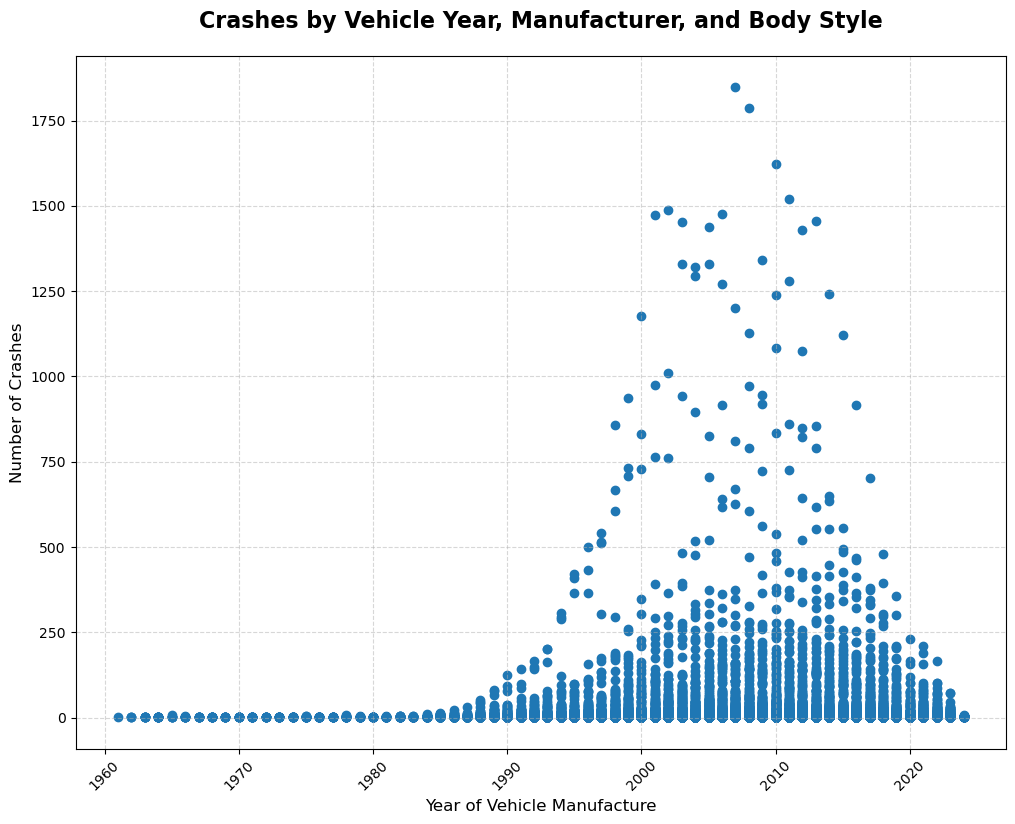

In [22]:
plt.figure(figsize=(12,9))
plt.scatter(crash_counts['VYM'],crash_counts['CRASH_COUNT'])

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.xlabel('Year of Vehicle Manufacture', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.title('Crashes by Vehicle Year, Manufacturer, and Body Style', fontsize=16, fontweight='bold', pad=20)

#plt.savefig('task3_1_scatter.png', format='png', dpi=300)